In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, BatchNormalization,
    Flatten, Dense, Dropout, GlobalAveragePooling2D
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2, ResNet50

from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix


Mounted at /content/drive


In [ ]:
DATASET_DIR = "/content/drive/MyDrive/sorted_waste_dataset"

IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 6


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR + "/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

validate_generator = test_datagen.flow_from_directory(
    DATASET_DIR + "/validate",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    DATASET_DIR + "/test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


Found 7374 images belonging to 6 classes.
Found 2182 images belonging to 6 classes.
Found 1210 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


# **MODEL 1: CNN**

In [ ]:
model1 = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

model1.compile(
    optimizer=Adam(1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model1.fit(train_data, validation_data=val_data, epochs=EPOCHS)


Epoch 1/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 141s 599ms/step - accuracy: 0.3717 - loss: 1.7275 - val_accuracy: 0.6402 - val_loss: 1.1005
Epoch 2/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 139s 600ms/step - accuracy: 0.5578 - loss: 1.1462 - val_accuracy: 0.6732 - val_loss: 0.9875
Epoch 3/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 140s 603ms/step - accuracy: 0.6277 - loss: 0.9908 - val_accuracy: 0.6604 - val_loss: 1.0648
Epoch 4/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 141s 599ms/step - accuracy: 0.6979 - loss: 0.8191 - val_accuracy: 0.6874 - val_loss: 0.9144
Epoch 5/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 139s 603ms/step - accuracy: 0.7605 - loss: 0.6634 - val_accuracy: 0.7016 - val_loss: 0.9717
Epoch 6/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 141s 601ms/step - accuracy: 0.8281 - loss: 0.4888 - val_accuracy: 0.6247 - val_loss: 1.3303
Epoch 7/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 141s 612ms/step - accuracy: 0.8860 - loss: 0.3363 - val_accuracy: 0.6467 - val_loss: 1.3270
Epoch 8/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 141s 608ms/step - accuracy: 0.9236 -

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TEST_DIR = "/content/drive/MyDrive/sorted_waste_dataset/test"
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


Found 1210 images belonging to 6 classes.


38/38 ━━━━━━━━━━━━━━━━━━━━ 257s 7s/step
MODEL PERFORMANCE METRICS
Accuracy  : 51.40%
Precision : 0.6333
Recall    : 0.5140
F1 Score  : 0.5249
Z-Score   : 32.42

DETAILED CLASSIFICATION REPORT
                 precision    recall  f1-score   support

biodegradedable       0.54      0.99      0.70        72
      cardboard       0.49      1.00      0.66        60
          glass       0.15      1.00      0.27        36
          metal       0.43      0.32      0.37       170
          paper       0.80      0.39      0.52       523
        plastic       0.58      0.56      0.57       349

       accuracy                           0.51      1210
      macro avg       0.50      0.71      0.51      1210
   weighted avg       0.63      0.51      0.52      1210



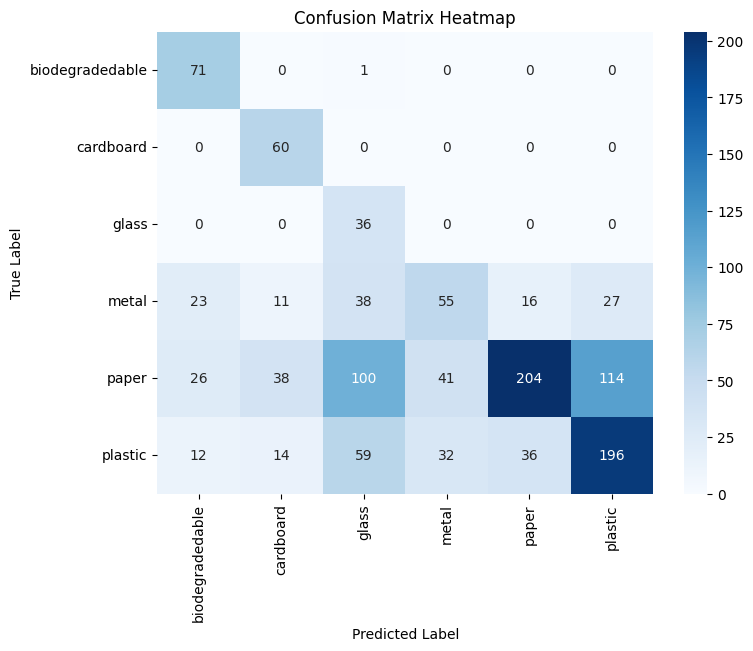

In [ ]:
# =========================================================
# UNIVERSAL EVALUATION BLOCK FOR CNN MODELS
# =========================================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# -------------------------------
# SELECT MODEL HERE
# -------------------------------
model = model1   # change to model2, model3, ...

# -------------------------------
# PREDICTIONS
# -------------------------------
y_prob = model.predict(test_data)
y_pred = np.argmax(y_prob, axis=1)
y_true = test_data.classes

class_names = list(test_data.class_indices.keys())
num_classes = len(class_names)

# -------------------------------
# METRICS
# -------------------------------
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average="weighted")
recall = recall_score(y_true, y_pred, average="weighted")
f1 = f1_score(y_true, y_pred, average="weighted")

print("===================================")
print("MODEL PERFORMANCE METRICS")
print("===================================")
print(f"Accuracy  : {accuracy * 100:.2f}%")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

# -------------------------------
# Z-SCORE (Statistical Significance)
# -------------------------------
random_accuracy = 1 / num_classes
std_dev = np.sqrt((random_accuracy * (1 - random_accuracy)) / len(y_true))
z_score = (accuracy - random_accuracy) / std_dev

print(f"Z-Score   : {z_score:.2f}")

# -------------------------------
# CLASSIFICATION REPORT
# -------------------------------
print("\nDETAILED CLASSIFICATION REPORT")
print(classification_report(y_true, y_pred, target_names=class_names))

# -------------------------------
# CONFUSION MATRIX
# -------------------------------
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


# **CNN MODEL 2: Deeper CNN**

In [ ]:
model2 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

model2.compile(
    optimizer=Adam(1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model2.fit(train_data, validation_data=val_data, epochs=EPOCHS)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 307s 1s/step - accuracy: 0.3859 - loss: 1.5387 - val_accuracy: 0.6705 - val_loss: 0.9955
Epoch 2/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 319s 1s/step - accuracy: 0.5587 - loss: 1.1613 - val_accuracy: 0.6159 - val_loss: 1.0945
Epoch 3/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 292s 1s/step - accuracy: 0.6311 - loss: 0.9896 - val_accuracy: 0.6778 - val_loss: 0.9092
Epoch 4/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 294s 1s/step - accuracy: 0.6826 - loss: 0.8499 - val_accuracy: 0.7218 - val_loss: 0.8702
Epoch 5/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 308s 1s/step - accuracy: 0.7545 - loss: 0.6742 - val_accuracy: 0.7062 - val_loss: 0.9799
Epoch 6/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 324s 1s/step - accuracy: 0.8033 - loss: 0.5359 - val_accuracy: 0.6806 - val_loss: 1.0963
Epoch 7/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 300s 1s/step - accuracy: 0.8587 - loss: 0.4037 - val_accuracy: 0.6728 - val_loss: 1.3728
Epoch 8/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 300s 1s/step - accuracy: 0.9009 - loss: 0.2935 - val_accu

38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 547ms/step
MODEL PERFORMANCE METRICS
Accuracy  : 60.58%
Precision : 0.6909
Recall    : 0.6058
F1 Score  : 0.6150
Z-Score   : 40.99

DETAILED CLASSIFICATION REPORT
                 precision    recall  f1-score   support

biodegradedable       0.48      1.00      0.65        72
      cardboard       0.67      0.98      0.80        60
          glass       0.24      1.00      0.38        36
          metal       0.43      0.52      0.47       170
          paper       0.78      0.63      0.69       523
        plastic       0.78      0.42      0.55       349

       accuracy                           0.61      1210
      macro avg       0.56      0.76      0.59      1210
   weighted avg       0.69      0.61      0.61      1210



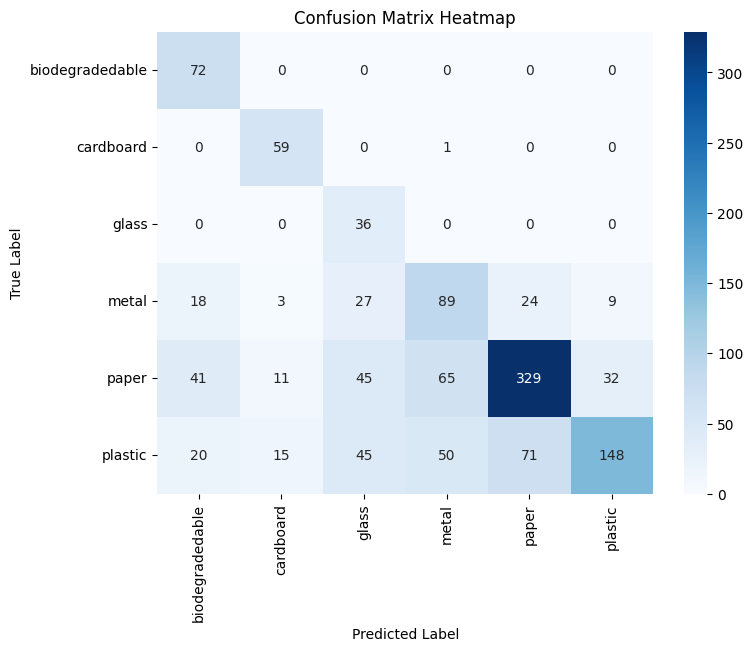

In [ ]:
# =========================================================
# UNIVERSAL EVALUATION BLOCK FOR CNN MODELS
# =========================================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# -------------------------------
# SELECT MODEL HERE
# -------------------------------
model = model2   # change to model2, model3, ...

# -------------------------------
# PREDICTIONS
# -------------------------------
y_prob = model.predict(test_data)
y_pred = np.argmax(y_prob, axis=1)
y_true = test_data.classes

class_names = list(test_data.class_indices.keys())
num_classes = len(class_names)

# -------------------------------
# METRICS
# -------------------------------
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average="weighted")
recall = recall_score(y_true, y_pred, average="weighted")
f1 = f1_score(y_true, y_pred, average="weighted")

print("===================================")
print("MODEL PERFORMANCE METRICS")
print("===================================")
print(f"Accuracy  : {accuracy * 100:.2f}%")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

# -------------------------------
# Z-SCORE (Statistical Significance)
# -------------------------------
random_accuracy = 1 / num_classes
std_dev = np.sqrt((random_accuracy * (1 - random_accuracy)) / len(y_true))
z_score = (accuracy - random_accuracy) / std_dev

print(f"Z-Score   : {z_score:.2f}")

# -------------------------------
# CLASSIFICATION REPORT
# -------------------------------
print("\nDETAILED CLASSIFICATION REPORT")
print(classification_report(y_true, y_pred, target_names=class_names))

# -------------------------------
# CONFUSION MATRIX
# -------------------------------
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


# **CNN MODEL 3: CNN + Dropout**

In [ ]:
model3 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model3.compile(
    optimizer=Adam(1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model3.fit(train_data, validation_data=val_data, epochs=EPOCHS)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 247s 1s/step - accuracy: 0.3900 - loss: 1.7775 - val_accuracy: 0.6590 - val_loss: 1.0269
Epoch 2/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.5502 - loss: 1.1991 - val_accuracy: 0.6137 - val_loss: 0.9727
Epoch 3/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.6121 - loss: 1.0416 - val_accuracy: 0.6911 - val_loss: 0.9704
Epoch 4/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.6465 - loss: 0.9470 - val_accuracy: 0.6407 - val_loss: 1.0451
Epoch 5/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.7078 - loss: 0.7975 - val_accuracy: 0.6943 - val_loss: 0.9781
Epoch 6/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.7577 - loss: 0.6756 - val_accuracy: 0.7172 - val_loss: 0.9866
Epoch 7/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.7968 - loss: 0.5730 - val_accuracy: 0.7191 - val_loss: 0.9872
Epoch 8/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.8216 - loss: 0.5063 - val_accu

38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 378ms/step
MODEL PERFORMANCE METRICS
Accuracy  : 59.09%
Precision : 0.6738
Recall    : 0.5909
F1 Score  : 0.6041
Z-Score   : 39.60

DETAILED CLASSIFICATION REPORT
                 precision    recall  f1-score   support

biodegradedable       0.53      1.00      0.69        72
      cardboard       0.58      1.00      0.74        60
          glass       0.20      0.97      0.33        36
          metal       0.48      0.48      0.48       170
          paper       0.79      0.53      0.64       523
        plastic       0.69      0.54      0.60       349

       accuracy                           0.59      1210
      macro avg       0.54      0.75      0.58      1210
   weighted avg       0.67      0.59      0.60      1210



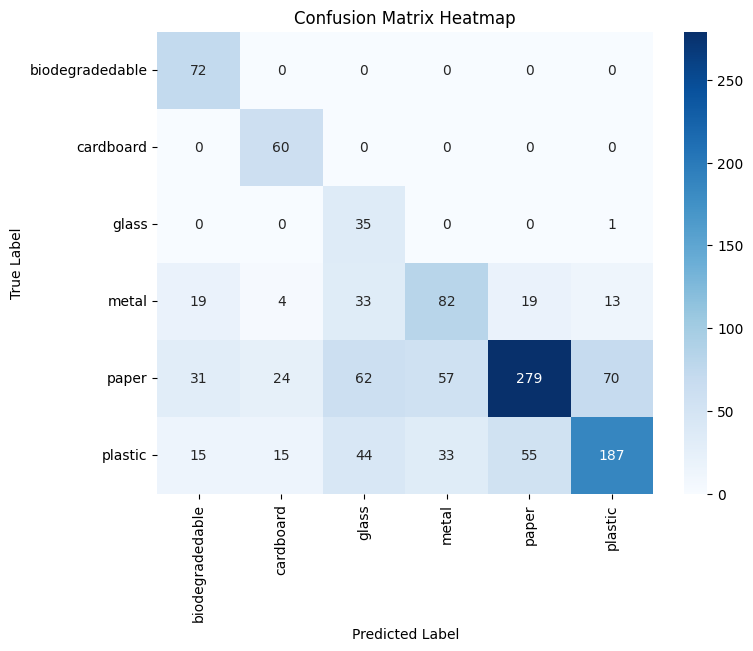

In [ ]:
# =========================================================
# UNIVERSAL EVALUATION BLOCK FOR CNN MODELS
# =========================================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# -------------------------------
# SELECT MODEL HERE
# -------------------------------
model = model3   # change to model2, model3, ...

# -------------------------------
# PREDICTIONS
# -------------------------------
y_prob = model.predict(test_data)
y_pred = np.argmax(y_prob, axis=1)
y_true = test_data.classes

class_names = list(test_data.class_indices.keys())
num_classes = len(class_names)

# -------------------------------
# METRICS
# -------------------------------
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average="weighted")
recall = recall_score(y_true, y_pred, average="weighted")
f1 = f1_score(y_true, y_pred, average="weighted")

print("===================================")
print("MODEL PERFORMANCE METRICS")
print("===================================")
print(f"Accuracy  : {accuracy * 100:.2f}%")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

# -------------------------------
# Z-SCORE (Statistical Significance)
# -------------------------------
random_accuracy = 1 / num_classes
std_dev = np.sqrt((random_accuracy * (1 - random_accuracy)) / len(y_true))
z_score = (accuracy - random_accuracy) / std_dev

print(f"Z-Score   : {z_score:.2f}")

# -------------------------------
# CLASSIFICATION REPORT
# -------------------------------
print("\nDETAILED CLASSIFICATION REPORT")
print(classification_report(y_true, y_pred, target_names=class_names))

# -------------------------------
# CONFUSION MATRIX
# -------------------------------
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()
